In [1]:
from dotenv import load_dotenv
load_dotenv()
import numpy as np
import pickle
import os
from scipy.spatial.distance import squareform
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import MDS
import pandas as pd
from PIL import Image
from scipy.spatial.distance import pdist
from tqdm import tqdm
import glob as glob
import argparse
from scipy.stats import pearsonr
import hcp_utils as hcp
import json
from pathlib import Path

pixdim[1,2,3] should be non-zero; setting 0 dims to 1


In [2]:
def mds(utv, pos=None, n_jobs=1, n_components=2):
    #this function copied from NSD code
    """ pos = mds(utv)

    mds computes the multi-dimensional scaling solution on a 
    two dimensional plane, for a representational dissimilarity matrix.

    Args:

        utv (array): 1D upper (or lower) triangular part of an RDM

        pos (array, optional): set of 2D coordinates to initialise the MDS
                            with. Defaults to None.

        n_jobs (int, optional): number of cores to distribute to.
                            Defaults to 1.

    Returns:

        [array]: 2D aray of x and y coordinates.

    """

    rdm = squareform(utv)
    seed = np.random.RandomState(seed=3)
    mds = MDS(
        n_components=n_components,
        max_iter=100,
        random_state=seed,
        dissimilarity="precomputed",
        n_jobs=n_jobs
    )
    pos = mds.fit_transform(rdm, init=pos)

    return pos


In [3]:
def create_rdm(X: np.ndarray, method: str = 'pearson'):
    #fills in complete matrix
    #X is shape numstim x numvertices (i.e., features)
    numstim = X.shape[0]
    rdm = np.zeros((numstim,numstim))
    for i in range(numstim):
        for j in range(numstim):
            if method == 'pearson':
                rdm[i,j] = 1-pearsonr(X[i,:], X[j,:])[0]
    
    return rdm

In [ ]:
dataset_root = os.path.join(os.getenv("DATASETS_ROOT", "/default/path/to/datasets"), "MOSAIC") #use default if DATASETS_ROOT env variable is not set.
project_root = os.path.join(os.getenv("PROJECT_ROOT", "/default/path/to/project"))
n_components = 2
perplexity=30
hcp_roilist = pd.read_table(os.path.join(project_root, "src", "utils", "roi_list","hcp_glasser_roilist.txt"), sep=',')

In [ ]:
ROI = "LO1" #"L_MT" # ['LO1', 'LO2', 'PHA1', 'PHA2', 'MT']
roi_id = hcp_roilist.loc[hcp_roilist['ROI'] == ROI, 'ID'].values[0]
roi_indices = np.where(hcp.mmp.map_all == roi_id)[0] 
save_root = os.path.join(project_root, "output_tsne")
if not os.path.exists(save_root):
    os.makedirs(save_root)
datasets_to_include = ['NSD']
subjects_to_include = ['sub-01_NSD']
with open(os.path.join(dataset_root, 'train.json'), 'r') as f:
    train_val_all = json.load(f)
with open(os.path.join(dataset_root, 'test.json'), 'r') as f:
    test_all = json.load(f)

In [7]:
fmri_data_roi = []
filename = []
for idx, entry in enumerate(train_val_all):
    stim_filename = list(train_val_all[idx].keys())[0]
    seen_by = {}
    for dset in train_val_all[idx][stim_filename].keys():
        if dset in datasets_to_include:
            for sub in train_val_all[idx][stim_filename][dset].keys():
                if sub in subjects_to_include:
                    responses = train_val_all[idx][stim_filename][dset][sub]
                    for response in responses:
                        fmri_all = np.load(os.path.join(dataset_root, "betas_fsLR32k", response))
                        fmri_roi = fmri_all[roi_indices]
                        fmri_data_roi.append(np.load)
                        filename.append(stim_filename)



KeyboardInterrupt: 

In [ ]:
fmri_data_roi_subset = fmri_data_roi[:100]
filename_subset = filename[:100]

In [ ]:
fmri_data_roi_arr = np.concatenate(fmri_data_roi_subset)
print(fmri_data_roi_arr.shape)
#compute ROI RDM
rdm_flat = pdist(fmri_data_roi_arr, metric='correlation')
rdm = squareform(rdm_flat)
print(rdm.shape)
plt.imshow(rdm)

(100,)


ValueError: A 2-dimensional array must be passed.

In [ ]:

#compute MDS
Y_mds = mds(squareform(rdm), n_components=n_components)

tsne = TSNE(n_components=n_components, metric='precomputed', init=Y_mds, random_state=42, perplexity=perplexity, n_jobs=1)
X_tsne = tsne.fit_transform(rdm)
print("divergence: ", tsne.kl_divergence_)

/data/vision/oliva/blahner/anaconda3/envs/NeuroAI/lib/python3.10/site-packages/sklearn/manifold/_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


divergence:  1.7533957958221436


stretch: 10.0
v_Drum corps
/data/vision/oliva/scratch/datasets/HumanActionsDataset/derivatives/stimuli_metadata/frames/Drum corps/v_Drum corps_id_0Qo8FzNJ460_start_28.0_label_1
v_Playing kickball
/data/vision/oliva/scratch/datasets/HumanActionsDataset/derivatives/stimuli_metadata/frames/Playing kickball/v_Playing kickball_id_HByszN4xrLU_start_106.5_label_1
v_Hand car wash
/data/vision/oliva/scratch/datasets/HumanActionsDataset/derivatives/stimuli_metadata/frames/Hand car wash/v_Hand car wash_id_HZW1njYbYPI_start_65.5_label_1
v_Shuffleboard
/data/vision/oliva/scratch/datasets/HumanActionsDataset/derivatives/stimuli_metadata/frames/Shuffleboard/v_Shuffleboard_id_iyz1BjhV1J4_start_4.5_label_1
v_Croquet
/data/vision/oliva/scratch/datasets/HumanActionsDataset/derivatives/stimuli_metadata/frames/Croquet/v_Croquet_id_Q_rVIfFRxbk_start_12.0_label_1
v_Fixing bicycle
/data/vision/oliva/scratch/datasets/HumanActionsDataset/derivatives/stimuli_metadata/frames/Fixing bicycle/v_Fixing bicycle_id_9Ph

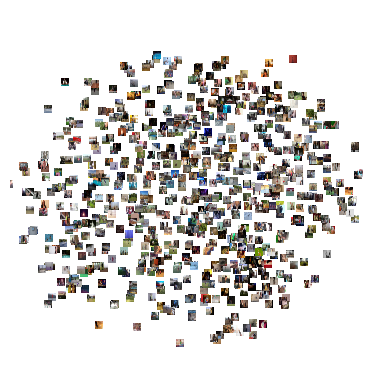

<Figure size 640x480 with 0 Axes>

In [ ]:

#not setup for 3D plots
fig, ax = plt.subplots()
# Get the center coordinates of the plot
x_center = 250 #ax.get_xlim()[1] / 2
y_center = 250 #ax.get_ylim()[1] / 2
stretch = np.floor(500 / (np.abs(np.max(X_tsne.ravel())) + np.abs(np.min(X_tsne.ravel()))))
print("stretch:", stretch)
scaler = 0.04
for i, pat in enumerate(X_tsne):
    image_filename = filename_subset[i]
    #find total number of frames
    image_path = os.path.join(dataset_root, "stimuli", "raw", image_filename)

    x, y = pat
    x_new = x_center + x*stretch
    y_new = y_center + y*stretch
    # plot middle frame 
    stimIDX = f"stimIDX{i+1:05}"
    img = np.array(Image.open(image_path)).astype(np.float64)
    ax.imshow(img, extent=[x_new, x_new+scaler*img.shape[1], y_new, y_new+scaler*img.shape[0]])
ax.set_xlim(0, 500)
ax.set_ylim(0, 500)
ax.set_aspect('equal')
ax.set_axis_off()
plt.savefig(os.path.join(save_root, f"{sub}_ROI-{ROI}_tsne_plotframes.png"), dpi=300)
plt.show()
plt.clf()